### AMAZON STOCK PRICE PREDICITON

Stock Market Prediction is the act of trying to determine the future value of company stock or other financial instrument traded on an exchange. The successful prediction of a stock’s future price can yield a high profit. Also, we know that the market is highly unstable and changes significantly when a new political party is formed after every 5 years due to a change in government policies for business.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load our datset 
stock=pd.read_csv(r"C:\Users\Hp\Downloads\mydata.csv",parse_dates=['Date'])
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gain,Loss,...,Usd_Rub_Close,Usd_Try_Close,IRX_Close,JPM_Close,BAC_Close,Citigroup_Close,WFC_Close,NASDAQ_Close,SP_500_Close,Dow_Jones_Close
0,2005-01-03,44.95,45.44,44.21,44.52,10446500,0,0.0,0.23,0.00,...,27.71,1.3440,2.204,26.45,34.03,440.71,19.30,2152.149902,1202.079956,10729.429688
1,2005-01-04,42.67,43.26,41.50,42.14,19418500,0,0.0,0.00,2.38,...,27.71,1.3510,2.292,26.18,33.56,436.96,19.31,2107.860107,1188.050049,10630.780273
2,2005-01-05,41.57,42.76,41.56,41.77,8354200,0,0.0,0.00,0.37,...,27.86,1.3740,2.282,26.24,33.17,442.44,19.33,2091.239990,1183.739990,10597.830078
3,2005-01-06,41.81,42.25,40.90,41.05,8700900,0,0.0,0.00,0.72,...,27.77,1.3925,2.267,26.39,33.12,446.73,19.40,2090.000000,1187.890015,10622.879883
4,2005-01-07,41.38,42.69,41.16,42.32,9836600,0,0.0,1.27,0.00,...,27.75,1.3940,2.277,26.17,32.76,444.17,19.38,2088.610107,1186.189941,10603.959961


## Data Exploration and Cleaning

In [3]:
# Drop all columns and only retain Date and Close for our forecasting
stock=stock[['Date','Close']]
stock.head()

,Date,Close
0,2005-01-03,44.52
1,2005-01-04,42.14
2,2005-01-05,41.77
3,2005-01-06,41.05
4,2005-01-07,42.32


In [4]:
# set our dat(e column as index
stock.set_index('Date',inplace=True)
stock.head()

,Close
Date,
2005-01-03,44.52
2005-01-04,42.14
2005-01-05,41.77
2005-01-06,41.05
2005-01-07,42.32


In [5]:
# checking for null values
stock.isnull().sum()

Close    0
dtype: int64

In [6]:
# check  and droppinjg duplicates
print(stock.duplicated().any())
stock.drop_duplicates()

True


,Close
Date,
2005-01-03,44.52
2005-01-04,42.14
2005-01-05,41.77
2005-01-06,41.05
2005-01-07,42.32
...,...
2019-08-16,1792.57
2019-08-19,1816.12
2019-08-20,1801.38


In [7]:
# Descriptive statistics on our dataset
stock.describe()

,Close
count,3552.000000
mean,451.876593
std,527.147584
min,26.070000
25%,80.587500
50%,231.700000
75%,617.777500
max,2039.510000


## Visualizing Daily Closing Stocks

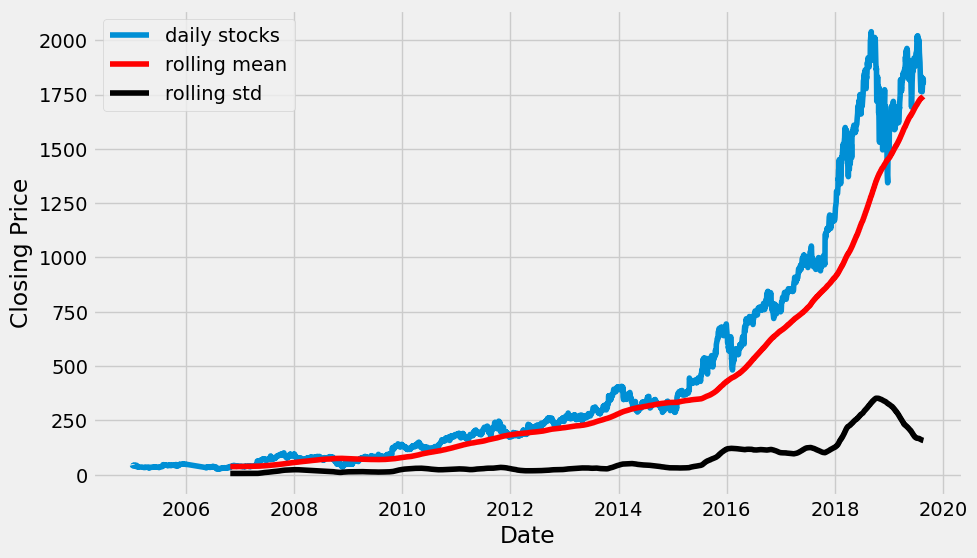

In [8]:
rolling_mean=stock.rolling(window=365).mean()
rolling_std=stock.rolling(window=365).std()
# visualizing our time series
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(stock['Close'],label='daily stocks')
plt.plot(rolling_mean,color='red',label='rolling mean')
plt.plot(rolling_std,color='black',label='rolling std')
plt.legend(loc='best')
plt.show()

## Stationarity Check

<Figure size 1200x600 with 0 Axes>

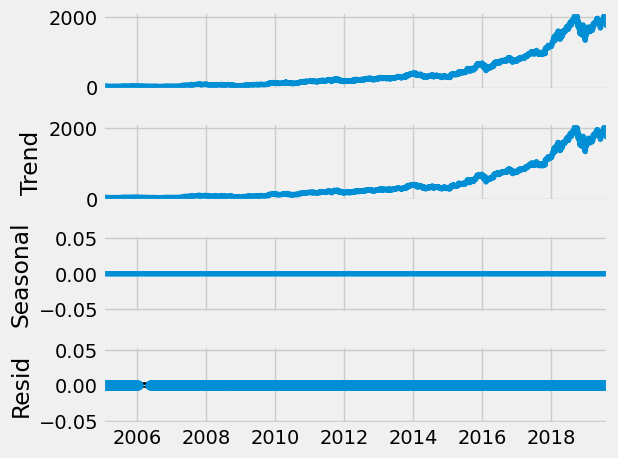

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(12,6))
decomposition =seasonal_decompose(stock,model='additive',period=1)
decomposition.plot()
plt.show()

## Augmented Dickey Fuller Test

Null Hypothesis: The series has a unit root implying its not stationary

Alternate Hypothesis: The series has no unit root thus stationary

we shall reject the null hypothesis if p value is less than 0.05 and test statistic less than critical value


In [10]:
from statsmodels.tsa.stattools import adfuller
Adftest=adfuller(stock,autolag='AIC')
print(f'p_value : {Adftest[1]}')
print(f'Test Statistic : {Adftest[0]}')
for key,values in Adftest[4].items():
    print(f'Criticality {key}:{values}')

p_value : 0.9983821165428911
Test Statistic : 1.8169853705976817
Criticality 1%:-3.4322085838690244
Criticality 5%:-2.862361217190852
Criticality 10%:-2.567207147908185


## Train and Test Split

In [11]:
index=int(0.9*stock.shape[0])
train_set=stock[:index]
test_set=stock[index:]

In [12]:
# determining hyperparameter values of p,d,q using custom for loop
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import itertools
from sklearn.metrics import mean_squared_error
p=range(0,3)
q=range(0,3)
d=range(0,2)
combinations=list(itertools.product(p,d,q))
order1=[]
rmse=[]
for pdq in combinations:
        model=ARIMA(train_set,order=pdq).fit()
        prediction=model.predict(start=len(train_set),end=stock.shape[0]-1)
        error=np.sqrt(mean_squared_error(test_set,prediction))
        order1.append(pdq)
        rmse.append(error)
        
df=pd.DataFrame(list(zip(order1,rmse)),columns=['Order','RMSE'])
df

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

,Order,RMSE
0,"(0, 0, 0)",1446.250774
1,"(0, 0, 1)",1445.007424
2,"(0, 0, 2)",1444.419105
3,"(0, 1, 0)",254.710320
4,"(0, 1, 1)",255.585851
5,"(0, 1, 2)",254.943287
6,"(1, 0, 0)",263.625940
7,"(1, 0, 1)",264.527912
8,"(1, 0, 2)",264.184054
9,"(1, 1, 0)",255.585843


## Building ARIMA model

we need to determine the hyperparameters p -Autoregression and q-Moving Average
we shall use grid search to manually identfy this parameters

In [13]:
# determining hyperparameter values of p,q using custom for loop
# our best model parameters with lowest RMSE is (2,1,2)
model=ARIMA(train_set,order=(2,1,2)).fit()

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Model Evaluation

In [16]:
prediction=model.predict(start=len(train_set),end=len(train_set)+len(test_set)-1)
prediction.index=test_set.index
error=np.sqrt(mean_squared_error(test_set,prediction))
print(error)

252.20465660295758


C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [17]:
# checking mean and standard deviation of test_set
test_set.mean(),test_set.std()

(Close    1745.48941
 dtype: float64,
 Close    157.221797
 dtype: float64)

Our model RMSE is bigger than the standard deviation of testing set. this suggest our model is not performing well .We can resort to Neural Networks to get a more accurate prediction

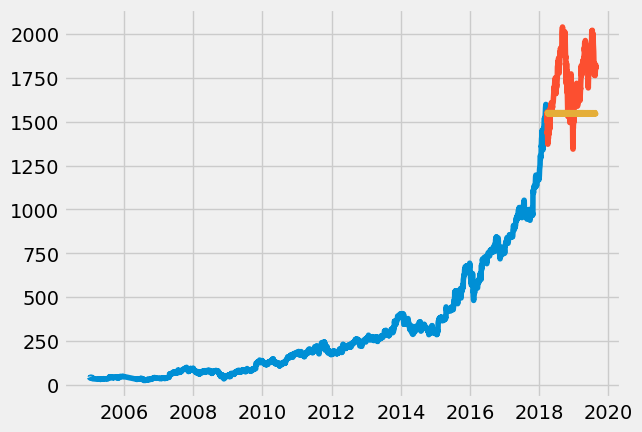

In [20]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(prediction)